# The K-nearest neighbors algorithm

In this notebook you will implement the k-nearest neighbors (KNN) algorithm with k-fold cross validation

We will use the Iris dataset

Let's remember what we need to write the KNN algorithm

* Labeled, multidimensional data (training, and validation set)
* A distance (L1 vs L2)
* A number of neighbors (must be odd)

In [189]:
import random 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy import stats
%matplotlib inline

iris = datasets.load_iris() 
x = iris.data
y = iris.target

x = x[:, :2]
# x = x[2: 4]

In [190]:
# in this notebook I am going to use lowerCamelCase
nTotal = x.shape[0]
nTest = nTotal // 10
nTrain = nTotal - nTest

# we randomize training indexes rather than testing 
# so we can easily append data to folds later on 
trainIndex = np.random.choice(range(nTotal), size = nTrain, replace = False)
testIndex = np.delete(range(nTotal), trainIndex)

xTest = x[testIndex]
yTest = y[testIndex]
xTrain = x[trainIndex]
yTrain = y[trainIndex]

In [191]:
nFolds = 5
foldSize = nTrain // nFolds

xFolds = [] 
yFolds = [] 

beginValue = 0
endValue = foldSize
# does this algorithm uses all training data? 
for i in range(nFolds):
  xFolds.append(xTrain[beginValue: endValue])
  yFolds.append(yTrain[beginValue: endValue])
  beginValue += foldSize 
  endValue += foldSize

In [192]:
kS = [1, 3, 5, 11, 21, 51, 101]

In [193]:
# Norms 
def l1Norm(x, a):
  norm = []

  for i in range(x.shape[0]): 
    norm.append(sum(abs(ia - ix) for ia, ix in zip(a, x[i])))

  return norm

def l2Norm(x, a):
  norm = []

  for i in range(x.shape[0]): 
    norm.append(sum( pow(pow(ia, 2) + pow(ix, 2), 1/2) for ia, ix in zip(a, x[i])))

  return norm

Ok, we have everything we need. Now we can write the KNN algorithm with k-fold cross validation. 

The algorithm is:
* For all k-nearest neighbor values that we want to try
    * For all possible k-fold splits of training and validation data
        * Store the features and classes of the training data
        * For each validation point:
            * Compute the distance between the validation datapoint and all the training datapoints.
            * Find the top k nearest training neighbors
            * The category of the validation datapoint is presumed to be the most common category among the k nearest training neighbors.





In [194]:
allKnnFoldAcc = []

for k in kS: 
  allFoldAcc = []

  for iFold in range(nFolds):
    xVl = xFolds[iFold][25: foldSize]
    yVl = yFolds[iFold][25: foldSize]
    xTr = xFolds[iFold][0: foldSize - 2]
    yTr = yFolds[iFold][0: foldSize - 2]

    xTr = np.vstack(xTr) # do not change this line
    yTr = np.hstack(yTr) # do not change this line
        
    KNN = []
    for x in xVl: 
      allDistances = l2Norm(xTr, x)
      sortedDistances = sorted([(d, i) for i, d in enumerate(allDistances)])
      kCloseExamps = sortedDistances[: k]
      kCloseCategories = []
      for examp in kCloseExamps:
        kCloseCategories.append(yTr[examp[1]])
                
      KNN.append(kCloseCategories)

    correctCount = 0
    for iknn, knn in enumerate(KNN):
      if stats.mode(knn)[0] == yVl[iknn]:
        correctCount += 1
    allFoldAcc.append(correctCount / len(yVl))

  allKnnFoldAcc.append(allFoldAcc)

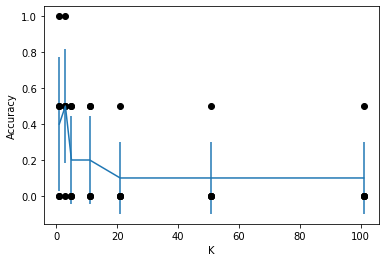

In [195]:
plt.plot(kS, allKnnFoldAcc, 'ok')
plt.errorbar(kS, np.mean(allKnnFoldAcc, axis = 1), np.std(allKnnFoldAcc, axis = 1))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

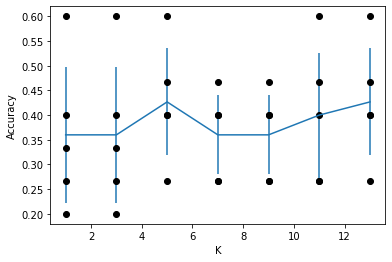

In [196]:
# now find which value of k gave you the best results
kS = [1, 3, 5, 7, 9, 11, 13] # accuracy: 1.0

# use the entire training set to create your model
# - done?


# I know that the following algorithm is incorrect; I could not 
# change validation points to testing due to difference of their types 
allKnnFoldAcc = []

for k in kS: 
  allFoldAcc = []

  for iFold in range(nFolds):
    xTr = xFolds[iFold][0: foldSize - 2]
    yTr = yFolds[iFold][0: foldSize - 2]

    xTr = np.vstack(xTr) # do not change this line
    yTr = np.hstack(yTr) # do not change this line
        
    KNN = []
    for x in xTest: 
      allDistances = l2Norm(xTr, x)
      sortedDistances = sorted([(d, i) for i, d in enumerate(allDistances)])
      kCloseExamps = sortedDistances[: k]
      kCloseCategories = []
      for examp in kCloseExamps:
        kCloseCategories.append(yTr[examp[1]])
                
      KNN.append(kCloseCategories)

    correctCount = 0
    for iknn, knn in enumerate(KNN):
      if stats.mode(knn)[0] == yTr[iknn]:
        correctCount += 1
    allFoldAcc.append(correctCount / len(yTest))

  allKnnFoldAcc.append(allFoldAcc)
  
plt.plot(kS, allKnnFoldAcc, 'ok')
plt.errorbar(kS, np.mean(allKnnFoldAcc, axis = 1), np.std(allKnnFoldAcc, axis = 1))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

# What is the test accuracy that you obtained?
# around 0.04

Once you are done, try the following:
* Use the L2 norm instead of L1 
* Use another set of 2 features from the Iris dataset
* Use more than two features. Start using 3 features and generate 3D plots.

Do you understand what is happenning in all the lines of code that were prodivided to you and you did not have to write?

In [197]:
# Use the L2 norm instead of L1
# - the function for L2 norm is written but currently not being used 

In [198]:
# Use another set of 2 features from the Iris dataset
# I commented out code that takes last 2 argument of X, but you can test with it

In [199]:
# Use more than two features. Start using 3 features and generate 3D plots.

# I kinda don't have time, so I didn't make everything as functions 
# but I think the concept is the same as like as in the first homework 
# you take working 2D functions and rewrite the code so it includes 
# more arguments  

Yes, I understand all the lines of code that were prodivided to me.